# Problem Statement1

In [1]:
import pandas as pd
import seaborn as sns

In [6]:
delivery=pd.read_csv("D:\DATA SCIENCE\ASSIGNMENTS\delivery_time.csv")

In [7]:
delivery

,Delivery Time,Sorting Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10
5,15.35,6
6,19.00,7
7,9.50,3
8,17.90,10
9,18.75,9


In [8]:
delivery.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Delivery Time  21 non-null     float64
 1   Sorting Time   21 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 464.0 bytes


In [9]:
delivery.corr()

,Delivery Time,Sorting Time
Delivery Time,1.000000,0.825997
Sorting Time,0.825997,1.000000


C:\Users\ISHIKA\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Delivery Time', ylabel='Density'>

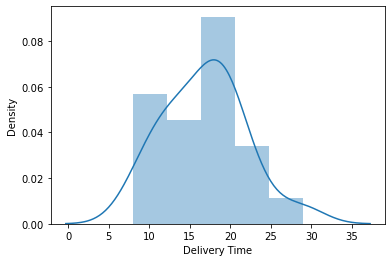

In [10]:
sns.distplot(delivery['Delivery Time'])

C:\Users\ISHIKA\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Sorting Time', ylabel='Density'>

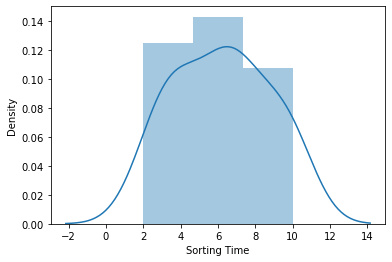

In [11]:
sns.distplot(delivery['Sorting Time'])

In [12]:
import statsmodels.formula.api as smf

In [13]:
delivery=delivery.rename({'Delivery Time':'Delivery_Time','Sorting Time':'Sorting_Time'},axis=1)

In [14]:
delivery

,Delivery_Time,Sorting_Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10
5,15.35,6
6,19.00,7
7,9.50,3
8,17.90,10
9,18.75,9


In [15]:
model=smf.ols("Delivery_Time~Sorting_Time", data=delivery).fit()

In [16]:
model.params

Intercept       6.582734
Sorting_Time    1.649020
dtype: float64

<AxesSubplot:xlabel='Sorting_Time', ylabel='Delivery_Time'>

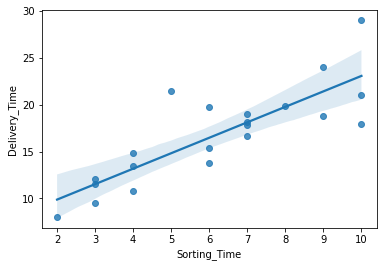

In [17]:
sns.regplot(x='Sorting_Time',y='Delivery_Time',data=delivery)

In [18]:
print(model.tvalues,'\n',model.pvalues)

Intercept       3.823349
Sorting_Time    6.387447
dtype: float64 
 Intercept       0.001147
Sorting_Time    0.000004
dtype: float64


In [19]:
(model.rsquared,model.rsquared_adj)

(0.6822714748417231, 0.6655489208860244)

In [20]:
newdata=pd.Series([10,4,6,9])

In [21]:
newdata

0    10
1     4
2     6
3     9
dtype: int64

In [22]:
data_pred=pd.DataFrame(newdata,columns=['Sorting_Time'])

In [23]:
model.predict(data_pred)

0    23.072933
1    13.178814
2    16.476853
3    21.423913
dtype: float64

# Log tranform

In [24]:
import numpy as np

In [27]:
x_log=np.log(delivery['Sorting_Time'])
y_log=np.log(delivery['Delivery_Time'])

In [28]:
model=smf.ols("y_log~x_log",data=delivery).fit()

In [29]:
model

In [30]:
model.params

Intercept    1.741987
x_log        0.597522
dtype: float64

In [31]:
print(model.tvalues,'\n',model.pvalues)

Intercept    13.085552
x_log         8.024484
dtype: float64 
 Intercept    5.921137e-11
x_log        1.601539e-07
dtype: float64


In [32]:
(model.rsquared,model.rsquared_adj)

(0.77216134926874, 0.7601698413355158)

In [33]:
y_log=(1.741987) + (0.597522)*4
y_log

4.132075

In [34]:
newtime=pd.Series([4,9])

In [35]:
pred=pd.DataFrame(newtime,columns=['x_log'])
pred

,x_log
0,4
1,9


In [36]:
model.predict(pred)

0    4.132076
1    7.119688
dtype: float64

In [37]:
delivery

,Delivery_Time,Sorting_Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10
5,15.35,6
6,19.00,7
7,9.50,3
8,17.90,10
9,18.75,9


In [45]:
delivery

,Delivery_Time,Sorting_Time,a_sqrt
0,21.00,10,4.582576
1,13.50,4,3.674235
2,19.75,6,4.444097
3,24.00,9,4.898979
4,29.00,10,5.385165
5,15.35,6,3.917908
6,19.00,7,4.358899
7,9.50,3,3.082207
8,17.90,10,4.230839
9,18.75,9,4.330127


In [47]:
model=smf.ols("Delivery_Time~a_sqrt",data = delivery).fit()
model

In [48]:
model.params

Intercept   -15.902667
a_sqrt        8.068752
dtype: float64

In [49]:
print(model.pvalues,'\n',model.tvalues)

Intercept    8.158463e-15
a_sqrt       9.829837e-21
dtype: float64 
 Intercept   -21.550902
a_sqrt       44.806348
dtype: float64


In [50]:
(model.rsquared,model.rsquared_adj)

(0.9906247323423885, 0.9901312972025141)

In [51]:
y_quad=(-3.930699)+(3.977225)*4

In [52]:
y_quad

11.978200999999999

In [53]:
newtime=pd.Series([4,9])

In [54]:
pred=pd.DataFrame(newtime,columns=['a_sqrt'])
pred

,a_sqrt
0,4
1,9


# model with Root Mean square transformation

In [57]:
delivery['Squar_del_time']=delivery.apply(lambda row:row.Delivery_Time**2,axis =1)
delivery

,Delivery_Time,Sorting_Time,a_sqrt,Squar_del_time
0,21.00,10,4.582576,441.0000
1,13.50,4,3.674235,182.2500
2,19.75,6,4.444097,390.0625
3,24.00,9,4.898979,576.0000
4,29.00,10,5.385165,841.0000
5,15.35,6,3.917908,235.6225
6,19.00,7,4.358899,361.0000
7,9.50,3,3.082207,90.2500
8,17.90,10,4.230839,320.4100
9,18.75,9,4.330127,351.5625


In [58]:
model=smf.ols('Squar_del_time~Sorting_Time',data=delivery).fit()

In [59]:
model

In [60]:
model.params

Intercept      -37.440078
Sorting_Time    55.553783
dtype: float64

In [61]:
print(model.pvalues,'\n',model.tvalues)

Intercept       0.593778
Sorting_Time    0.000035
dtype: float64 
 Intercept      -0.542504
Sorting_Time    5.368383
dtype: float64


In [62]:
(model.rsquared,model.rsquared_adj)

(0.6026728443618878, 0.5817608888019872)

# model with reciprocol transformation

In [64]:
reciprocal_del_time=1/delivery["Delivery_Time"]

In [65]:
reciprocal_del_time

0     0.047619
1     0.074074
2     0.050633
3     0.041667
4     0.034483
5     0.065147
6     0.052632
7     0.105263
8     0.055866
9     0.053333
10    0.050429
11    0.093023
12    0.059952
13    0.086957
14    0.083126
15    0.067204
16    0.072727
17    0.055218
18    0.125000
19    0.056085
20    0.046512
Name: Delivery_Time, dtype: float64

In [67]:
model=smf.ols('reciprocal_del_time~Sorting_Time',data=delivery).fit()

In [68]:
model.params

Intercept       0.110682
Sorting_Time   -0.007287
dtype: float64

In [69]:
print(model.pvalues,'\n',model.tvalues)

Intercept       9.669983e-12
Sorting_Time    4.059187e-06
dtype: float64 
 Intercept       14.525932
Sorting_Time    -6.378315
dtype: float64


In [70]:
(model.rsquared,model.rsquared_adj)

(0.6816508639250471, 0.6648956462368918)

# model using Yeo-Johnson Transformation

In [71]:
from scipy.stats import yeojohnson
yf_target, lam = yeojohnson(delivery["Delivery_Time"])

In [72]:
model=smf.ols('yf_target~Sorting_Time',data=delivery).fit()

In [73]:
model.params

Intercept       3.967570
Sorting_Time    0.424596
dtype: float64

In [74]:
print(model.pvalues,'\n',model.tvalues)

Intercept       1.440405e-08
Sorting_Time    2.095432e-06
dtype: float64 
 Intercept       9.388311
Sorting_Time    6.700429
dtype: float64


In [75]:
(model.rsquared,model.rsquared_adj)

(0.7026406506507266, 0.6869901585797122)

# Problem Statement 2

In [76]:
salary=pd.read_csv("D:\DATA SCIENCE\ASSIGNMENTS\Salary_Data.csv")

In [53]:
salary

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0
5,2.9,56642.0
6,3.0,60150.0
7,3.2,54445.0
8,3.2,64445.0
9,3.7,57189.0


In [77]:
salary.corr()

,YearsExperience,Salary
YearsExperience,1.000000,0.978242
Salary,0.978242,1.000000


C:\Users\ISHIKA\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='YearsExperience', ylabel='Density'>

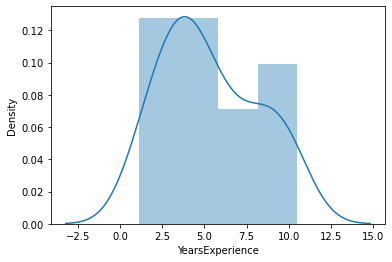

In [78]:
sns.distplot(salary['YearsExperience'])

C:\Users\ISHIKA\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Salary', ylabel='Density'>

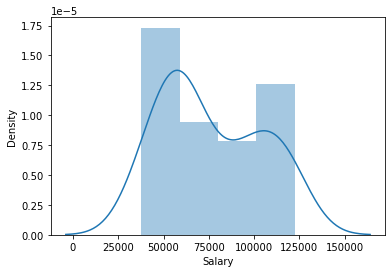

In [79]:
sns.distplot(salary['Salary'])

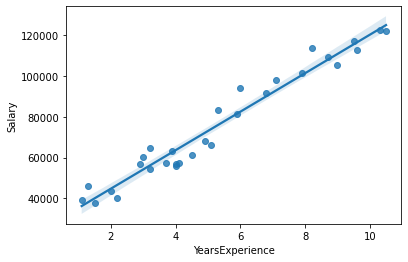

In [80]:
sns.regplot(x="YearsExperience",y="Salary",data=salary);

In [81]:
model=smf.ols("Salary~YearsExperience",data=salary).fit()

In [82]:
model.params

Intercept          25792.200199
YearsExperience     9449.962321
dtype: float64

In [83]:
print(model.tvalues,'\n',model.pvalues)


Intercept          11.346940
YearsExperience    24.950094
dtype: float64 
 Intercept          5.511950e-12
YearsExperience    1.143068e-20
dtype: float64


In [84]:
(model.rsquared,model.rsquared_adj)

(0.9569566641435086, 0.9554194021486339)

In [85]:
newdata=pd.Series([1,2,3,4])

In [86]:
data_pred=pd.DataFrame(newdata,columns=['YearsExperience'])

In [87]:
model.predict(data_pred)

0    35242.162520
1    44692.124842
2    54142.087163
3    63592.049484
dtype: float64

# model using logarithm

In [89]:
import numpy as np
salary1=np.log(salary)
salary1

,YearsExperience,Salary
0,0.095310,10.580073
1,0.262364,10.740843
2,0.405465,10.538237
3,0.693147,10.681091
4,0.788457,10.593906
5,1.064711,10.944506
6,1.098612,11.004597
7,1.163151,10.904946
8,1.163151,11.073567
9,1.308333,10.954117


<AxesSubplot:xlabel='YearsExperience', ylabel='Salary'>

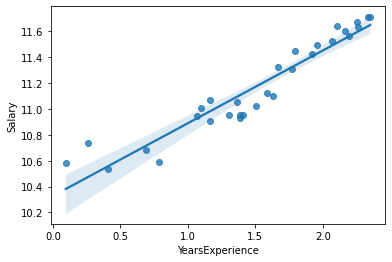

In [90]:
sns.regplot(x='YearsExperience',y='Salary',data=salary1)

In [91]:
model =smf.ols("Salary ~ YearsExperience",data=salary1).fit()
model

In [92]:
print(model.pvalues,'\n',model.tvalues)

Intercept          9.073132e-45
YearsExperience    7.395278e-16
dtype: float64 
 Intercept          184.867959
YearsExperience     16.352542
dtype: float64


In [93]:
(model.rsquared)

0.905215072581715

# model using squarroot transformation

In [94]:
salary.insert(len(salary.columns), 'A_sqrt',
            np.sqrt(salary.iloc[:,0]))
salary

,YearsExperience,Salary,A_sqrt
0,1.1,39343.0,1.048809
1,1.3,46205.0,1.140175
2,1.5,37731.0,1.224745
3,2.0,43525.0,1.414214
4,2.2,39891.0,1.483240
5,2.9,56642.0,1.702939
6,3.0,60150.0,1.732051
7,3.2,54445.0,1.788854
8,3.2,64445.0,1.788854
9,3.7,57189.0,1.923538


In [95]:
model=smf.ols('Salary~A_sqrt',data=salary).fit()
model

In [96]:
model.params

Intercept   -16055.769117
A_sqrt       41500.680583
dtype: float64

In [97]:
print(model.pvalues,'\n',model.pvalues)

Intercept    2.906965e-03
A_sqrt       8.565358e-18
dtype: float64 
 Intercept    2.906965e-03
A_sqrt       8.565358e-18
dtype: float64


In [98]:
(model.rsquared,model.rsquared_adj)

(0.9310009544993526, 0.9285367028743294)

# model with square transformation

In [99]:
salary['Squar_income']= salary.apply(lambda row: row.Salary**2,  axis=1)
salary

,YearsExperience,Salary,A_sqrt,Squar_income
0,1.1,39343.0,1.048809,1.547872e+09
1,1.3,46205.0,1.140175,2.134902e+09
2,1.5,37731.0,1.224745,1.423628e+09
3,2.0,43525.0,1.414214,1.894426e+09
4,2.2,39891.0,1.483240,1.591292e+09
5,2.9,56642.0,1.702939,3.208316e+09
6,3.0,60150.0,1.732051,3.618022e+09
7,3.2,54445.0,1.788854,2.964258e+09
8,3.2,64445.0,1.788854,4.153158e+09
9,3.7,57189.0,1.923538,3.270582e+09


In [100]:
model=smf.ols('Squar_income~YearsExperience',data=salary).fit()
model

In [101]:
model.params

Intercept         -1.609636e+09
YearsExperience    1.526836e+09
dtype: float64

In [102]:
print(model.pvalues,'\n',model.tvalues)

Intercept          5.114661e-04
YearsExperience    2.152535e-19
dtype: float64 
 Intercept          -3.926574
YearsExperience    22.352727
dtype: float64


In [103]:
(model.rsquared,model.rsquared_adj)

(0.946933959304622, 0.9450387435655013)

# model using BOX-cox transformation

In [105]:
 from scipy.stats import boxcox
bcx_target,lam =boxcox(salary["Salary"])

In [107]:
model=smf.ols('bcx_target~YearsExperience',data=salary).fit()
model

In [108]:
print(model.pvalues,'\n',model.tvalues)

Intercept          7.255691e-45
YearsExperience    3.477707e-18
dtype: float64 
 Intercept          186.350884
YearsExperience     20.117718
dtype: float64


In [109]:
(model.rsquared,model.rsquared_adj)

(0.9352934131758686, 0.9329824636464353)

# model using Yeo-Johnson Transformation

In [111]:
from scipy.stats import yeojohnson
yf_target, lam = yeojohnson(salary["Salary"])

In [112]:
model=smf.ols('yf_target~YearsExperience',data=salary).fit()

In [113]:
model.params

Intercept          15.751205
YearsExperience     0.283321
dtype: float64

In [114]:
print(model.pvalues,'\n',model.tvalues)

Intercept          7.240897e-45
YearsExperience    3.477604e-18
dtype: float64 
 Intercept          186.364479
YearsExperience     20.117740
dtype: float64


In [115]:
(model.rsquared,model.rsquared_adj)

(0.935293549568351, 0.9329826049100778)